In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)




df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()


In [ ]:
df.shape

(3677, 23)

In [ ]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

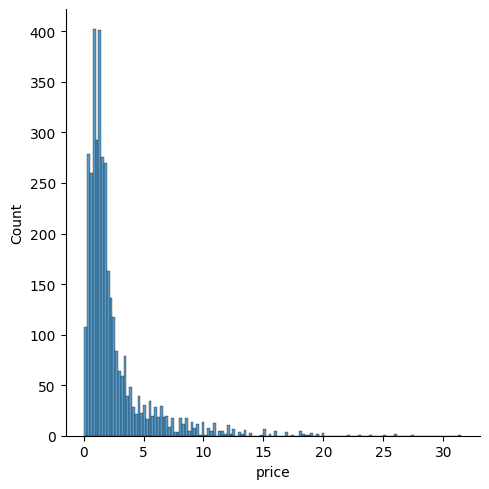

In [ ]:
sns.displot(df['price'])

<Axes: xlabel='price'>

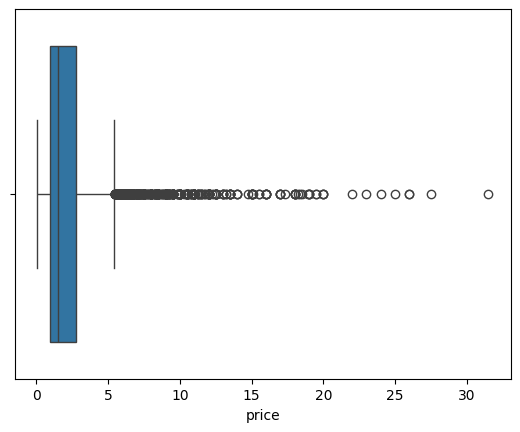

In [ ]:
sns.boxplot(x=df['price'])

In [ ]:
## calculate IQR for price and lower bound and upper bound
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=df[(df['price']<lower_bound)|(df['price']>upper_bound)]
num_outliers=len(outliers)
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [ ]:
outliers

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
6,flat,paras quartier,gwal pahari,7.50,14018.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,20.0,North-East,New Property,5350.0,NaN,NaN,0,1,0,1,1,2,49
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,0,70
25,house,independent,sector 41,9.00,27778.0,3240.0,Plot area 360(301.01 sq.m.),8,5,3+,3.0,NaN,Old Property,NaN,3240.0,NaN,0,1,1,1,0,2,26
26,house,independent,sector 41,7.00,28283.0,2475.0,Plot area 275(229.94 sq.m.),7,7,3+,3.0,South-West,Moderately Old,NaN,2475.0,NaN,1,1,1,1,0,0,151
29,house,international city by sobha phase 2,sector 109,5.65,10463.0,5400.0,Plot area 600(501.68 sq.m.),4,4,3+,2.0,North-East,New Property,NaN,5400.0,NaN,0,1,0,0,1,2,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,flat,vipul belmonte,sector 53,6.50,21922.0,2965.0,Super Built up area 2965(275.46 sq.m.),3,4,3+,0.0,NaN,Old Property,2965.0,NaN,NaN,1,0,0,0,1,1,72
3791,house,international city by sobha phase 2,sector 109,6.44,26502.0,2430.0,Plot area 270(225.75 sq.m.),4,5,3+,3.0,North-East,New Property,NaN,2430.0,NaN,1,1,1,1,0,1,138
3794,house,independent,sector 27,8.00,26298.0,3042.0,Plot area 338(282.61 sq.m.),9,9,3,4.0,North-East,Relatively New,NaN,3042.0,NaN,1,1,1,1,0,0,110
3799,house,international city by sobha phase 1,sector 109,6.00,9634.0,6228.0,Plot area 692(578.6 sq.m.),5,5,3+,2.0,South-West,Relatively New,NaN,6228.0,NaN,1,1,1,1,0,1,160


In [ ]:

outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,0,74
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
2488,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
2211,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
1686,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,0
3046,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
2765,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,145
2667,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,1,54
874,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,153
2096,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,31


**Price_per_sqft**

<ipython-input-14-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

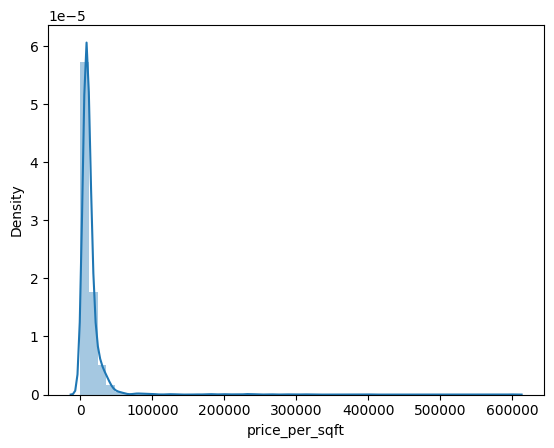

In [ ]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

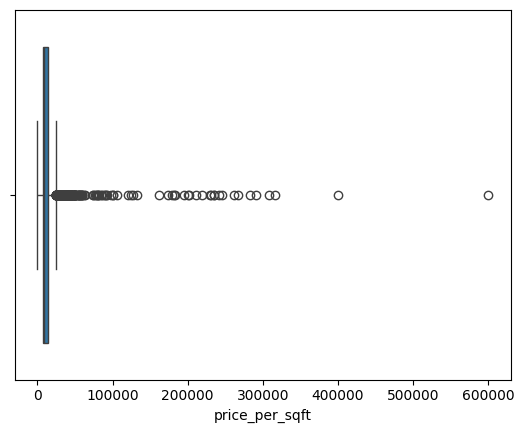

In [ ]:
sns.boxplot(x=df['price_per_sqft'])


In [ ]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats



(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [ ]:

outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

<ipython-input-17-8c5ad871d258>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [ ]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


<ipython-input-18-f07934424e06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [ ]:
outliers_sqft['price_per_sqft'].describe()


,price_per_sqft
count,354.000000
mean,29357.906780
std,12403.077309
min,2723.000000
25%,25562.000000
50%,29870.500000
75%,35549.500000
max,82540.000000


In [ ]:
df.update(outliers_sqft)


<ipython-input-21-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

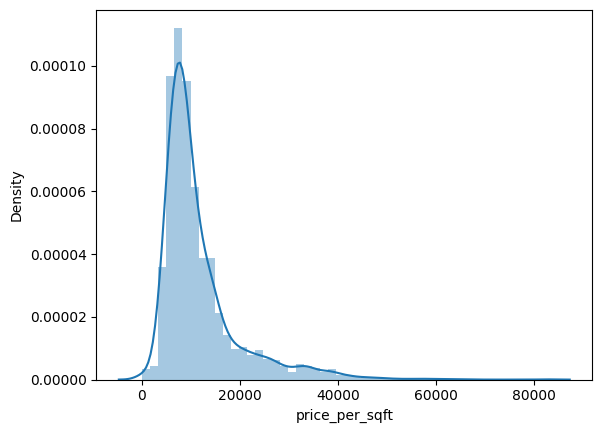

In [ ]:
sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft'>

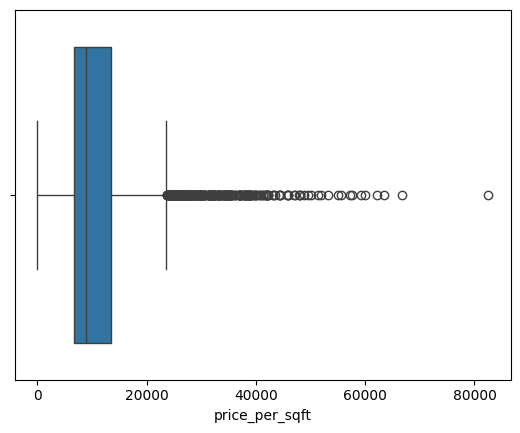

In [ ]:
sns.boxplot(x=df['price_per_sqft'])

In [ ]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
386,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,1,0
671,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,0,75
1200,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,2,153
1261,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
1349,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,1,0
1425,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,1,0
1640,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,2,160
1839,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,2,103
2211,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
2290,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,2,99


In [ ]:
df=df[df['price_per_sqft']<=50000]

<Axes: xlabel='price_per_sqft'>

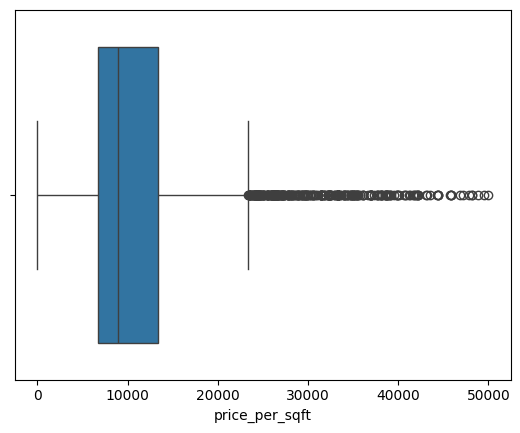

In [ ]:

sns.boxplot(x=df['price_per_sqft'])


**Area**

<ipython-input-26-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

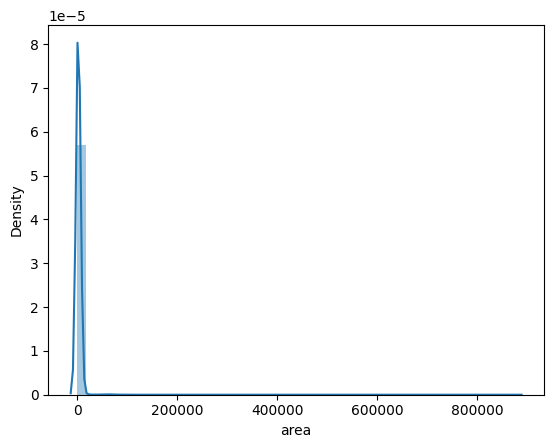

In [ ]:
sns.distplot(df['area'])

In [ ]:
df['area'].describe()

,area
count,3647.000000
mean,2947.723608
std,23208.194102
min,145.000000
25%,1262.000000
50%,1750.000000
75%,2350.000000
max,875000.000000


In [ ]:
df[df['area']>100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,1,44
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,0,44
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,1,76
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,1,65
3021,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,2,0


In [ ]:
df=df[df['area']<=100000]

<ipython-input-32-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

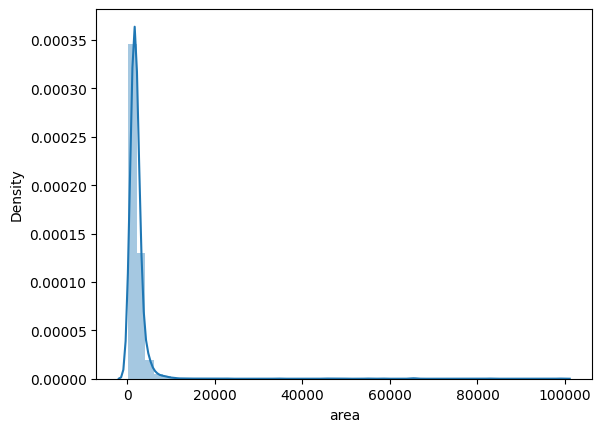

In [ ]:
sns.distplot(df['area'])


In [ ]:
df[df['area']>10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,1,15
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
115,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,1,37
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
747,house,independent,sohna road road,5.50,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,3,3,3+,2.0,West,Moderately Old,NaN,3500.0,NaN,1,1,0,1,1,1,49
818,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,2,60
1123,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,1,51
1358,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,2,61
1471,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3,3,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,1,0
1796,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,1,15


In [ ]:
df.drop(index=[2,48,115,1123,1796,2356,2503,2666,3649,1471],inplace=True)

In [ ]:
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

<ipython-input-43-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

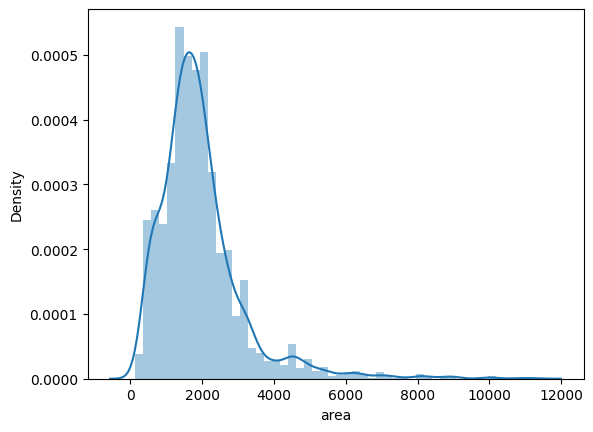

In [ ]:

sns.distplot(df['area'])


In [ ]:
df['area'].describe()

,area
count,3633.000000
mean,1977.316268
std,2017.188249
min,145.000000
25%,1261.000000
50%,1749.000000
75%,2329.000000
max,98978.000000


In [ ]:
df.drop(index=[818],inplace=True)

<Axes: xlabel='area'>

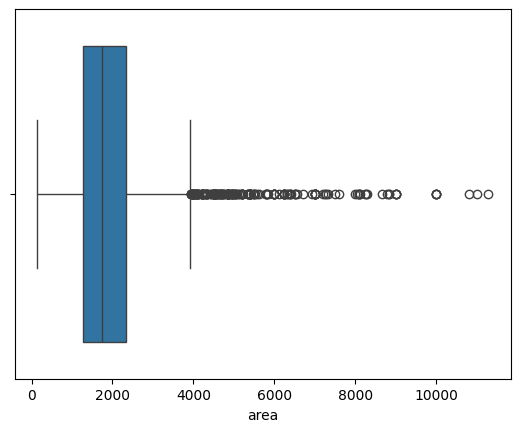

In [ ]:
sns.boxplot(x=df['area'])

In [ ]:
df['area'].describe()

,area
count,3632.000000
mean,1950.609031
std,1215.780369
min,145.000000
25%,1260.750000
50%,1748.000000
75%,2326.000000
max,11286.000000


**Bedrrom**

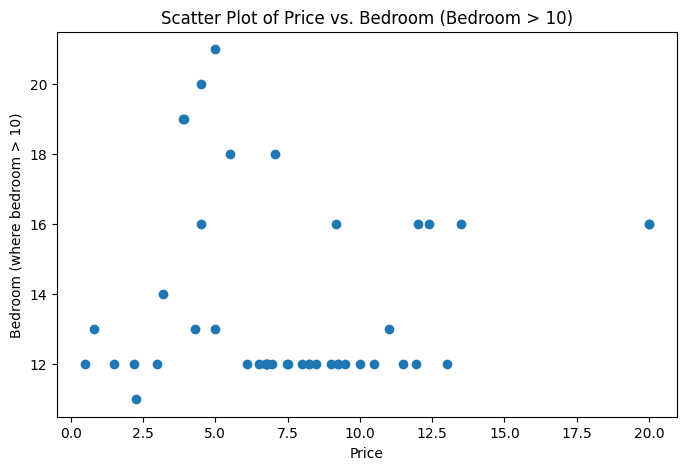

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df[df['bedRoom'] > 10]['price'], df[df['bedRoom'] > 10]['bedRoom'])
plt.xlabel('Price')
plt.ylabel('Bedroom (where bedroom > 10)')
plt.title('Scatter Plot of Price vs. Bedroom (Bedroom > 10)')
plt.show()


In [ ]:
# prompt: df[df['bedRoom'] > 10]['price'], df[df['bedRoom'] > 10]['bedRoom']   find correlation between then\m

correlation = df[df['bedRoom'] > 10]['price'].corr(df[df['bedRoom'] > 10]['bedRoom'])
print(f"The correlation between price and bedroom (where bedroom > 10) is: {correlation}")


The correlation between price and bedroom (where bedroom > 10) is: 0.04421173774285638


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
subset = df[df['bedRoom'] > 10]
X = subset[['bedRoom']]
y = subset['price']
model = LinearRegression().fit(X, y)

print(f"R² Score: {model.score(X, y):.4f}")
print(f"Regression Equation: price = {model.intercept_:.2f} + {model.coef_[0]:.2f} × bedRoom")


R² Score: 0.0020
Regression Equation: price = 6.66 + 0.07 × bedRoom


In [ ]:
df = df[df['bedRoom'] <= 12]

In [ ]:
df['bedRoom'].describe()

,bedRoom
count,3613.000000
mean,3.265707
std,1.574024
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,12.000000


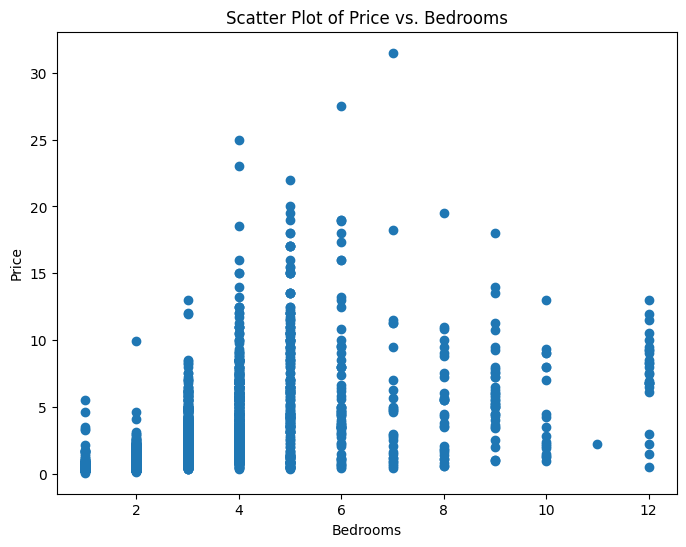

In [ ]:
# prompt: scatter plot between df['bedRoom'] and df['price']

plt.figure(figsize=(8, 6))
plt.scatter(df['bedRoom'], df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Bedrooms')
plt.show()


In [ ]:
df.shape

(3613, 23)

<ipython-input-61-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

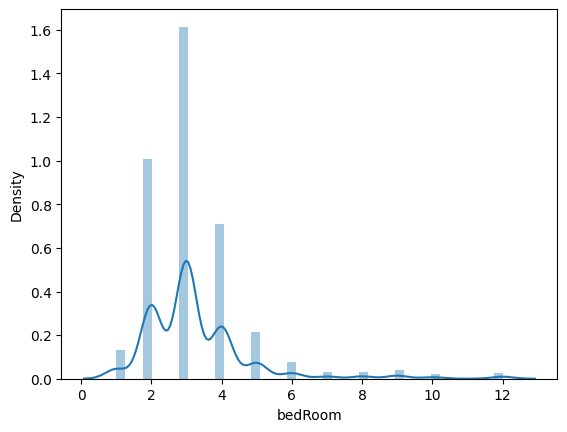

In [ ]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

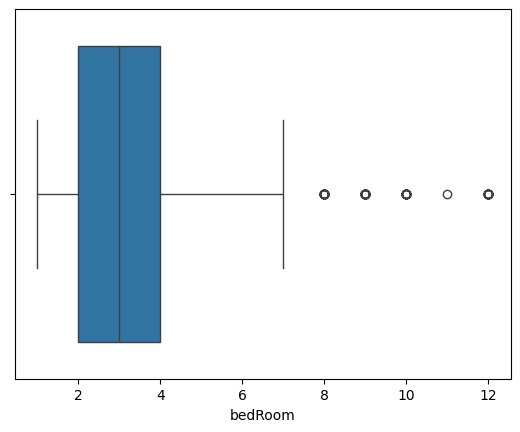

In [ ]:
sns.boxplot(x=df['bedRoom'])

**BathRoom**

<ipython-input-63-6f8990f100b4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

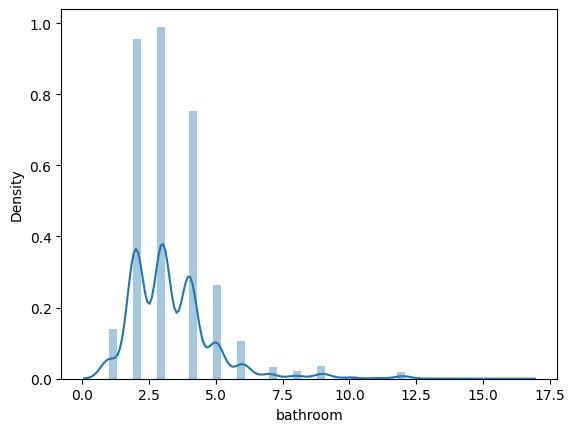

In [ ]:

sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

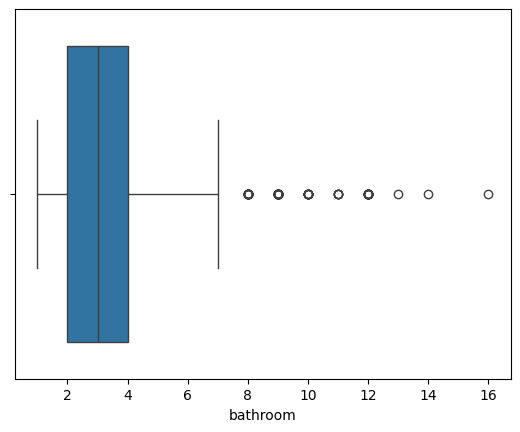

In [ ]:

sns.boxplot(x=df['bathroom'])



In [ ]:
df['bathroom'].describe(

)

,bathroom
count,3613.000000
mean,3.331857
std,1.623395
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,16.000000


In [ ]:
df[df['bathroom']>10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
119,house,independent,sector 55,7.49,27741.0,2700.0,Plot area 300(250.84 sq.m.),12.0,12.0,3+,4.0,South-East,Relatively New,NaN,2700.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,49.0
127,house,independent,sector 57,6.95,38611.0,1800.0,Plot area 192(160.54 sq.m.),12.0,12.0,3+,4.0,East,New Property,NaN,1728.0,NaN,0.0,1.0,1.0,0.0,0.0,2.0,73.0
354,house,independent,sector 46,6.50,27461.0,2367.0,Plot area 263(219.9 sq.m.),12.0,12.0,3+,4.0,North-West,Relatively New,NaN,2367.0,NaN,1.0,0.0,0.0,1.0,0.0,2.0,32.0
614,house,independent,sector 26,8.49,47167.0,1800.0,Plot area 200(167.23 sq.m.),12.0,12.0,3+,4.0,North,Relatively New,NaN,1800.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,42.0
975,house,uppal southend,sector 49,6.75,32328.0,2088.0,Plot area 232(21.55 sq.m.),12.0,12.0,3+,NaN,West,Moderately Old,NaN,232.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,49.0
1048,house,independent,sector 31,9.25,39530.0,2340.0,Plot area 265(221.57 sq.m.)Built Up area: 262 ...,12.0,12.0,3+,4.0,North-East,New Property,NaN,262.0,260.0,0.0,1.0,0.0,1.0,1.0,0.0,49.0
1165,house,independent,sector 43,2.25,7500.0,3000.0,Plot area 550(51.1 sq.m.)Built Up area: 3000 s...,11.0,11.0,3+,5.0,West,New Property,NaN,3000.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,28.0
1275,house,uppal southend,sector 49,6.75,32328.0,2088.0,Plot area 232(193.98 sq.m.),12.0,12.0,3+,3.0,North,Moderately Old,NaN,2088.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,49.0
1312,house,uppal southend,sector 49,6.75,31915.0,2115.0,Plot area 235(196.49 sq.m.),12.0,12.0,3+,3.0,West,Moderately Old,NaN,2115.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,49.0
1396,house,luxury dlf city floors,sector 26,8.25,45833.0,1800.0,Plot area 200(167.23 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1800.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,105.0


In [ ]:
df=df[df['bathroom']<=12]

In [ ]:
df.shape

(3610, 23)

**Super_builtup_area**

<ipython-input-70-ce4cb092a62b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

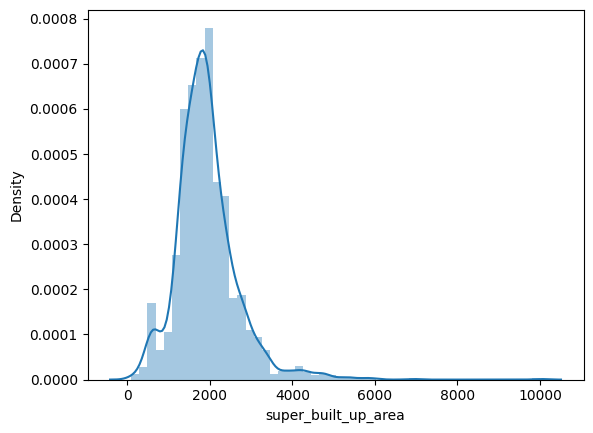

In [ ]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

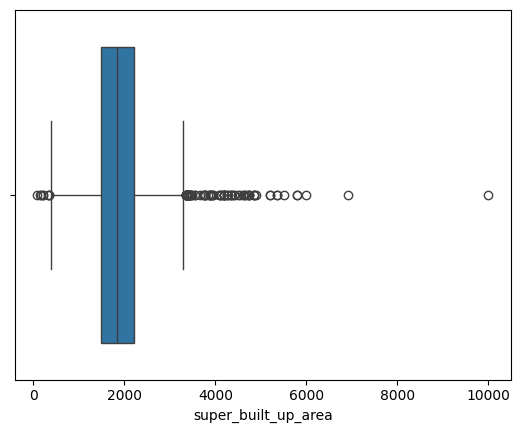

In [ ]:
sns.boxplot(x=df['super_built_up_area'])


In [ ]:

df['super_built_up_area'].describe()

,super_built_up_area
count,1875.000000
mean,1925.237627
std,764.172177
min,89.000000
25%,1479.500000
50%,1828.000000
75%,2215.000000
max,10000.000000


In [ ]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1323,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,140.0
3265,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0


**built_up_area**

<ipython-input-74-7e13bd12b627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

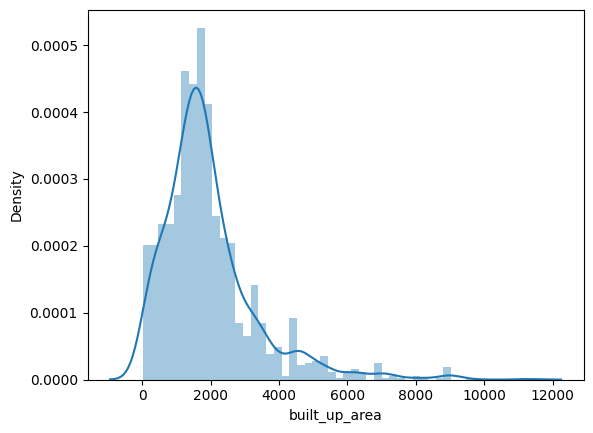

In [ ]:

sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

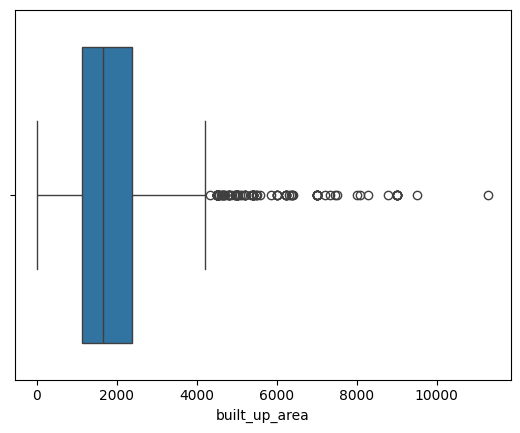

In [ ]:

sns.boxplot(x=df['built_up_area'])

In [ ]:

df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,42.0


**carpet area**

<ipython-input-77-becec57fa840>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

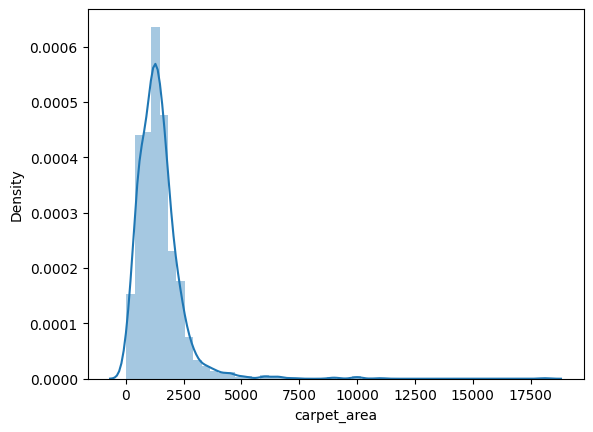

In [ ]:
sns.distplot(df['carpet_area'])

In [ ]:

df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2131,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,2.0,44.0
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,1.0,60.0


In [ ]:
df.loc[2131,'carpet_area']=1812

<ipython-input-80-bd70b6910aad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

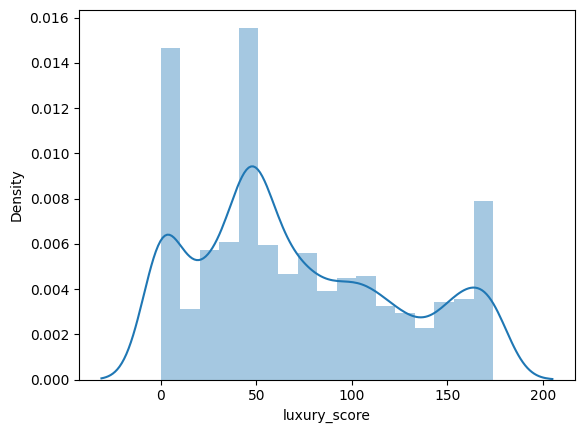

In [ ]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

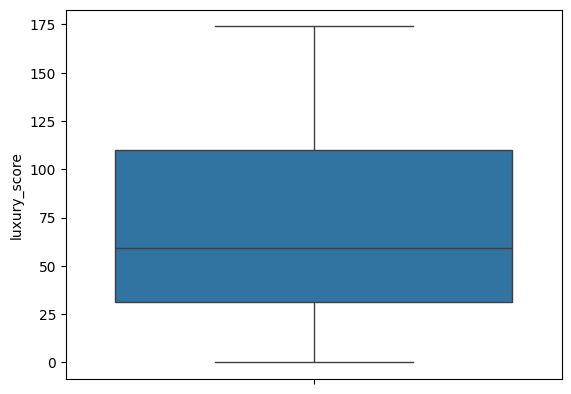

In [ ]:
sns.boxplot(df['luxury_score'])

In [ ]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])


<ipython-input-82-b63ef8b8d795>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = round((df['price']*10000000)/df['area'])


In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.0,1.0,1.0,0.0,0.0,0.0,1.0,38.0
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,17.0,NaN,New Property,NaN,1000.0,585.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0.0,1.0,0.0,0.0,1.0,2.0,174.0
5,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0.0,0.0,1.0,0.0,0.0,1.0,159.0


<ipython-input-84-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

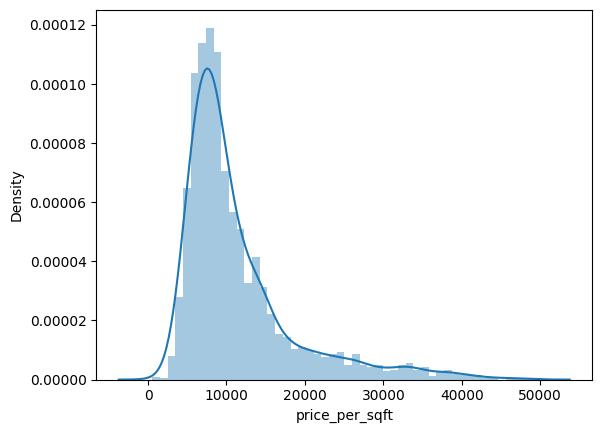

In [ ]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

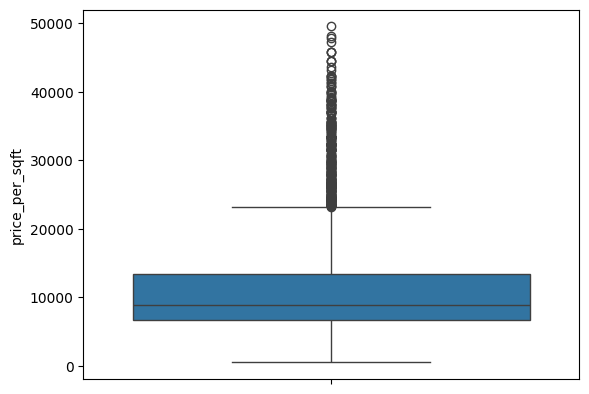

In [ ]:
sns.boxplot(df['price_per_sqft'])

In [ ]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

np.float64(183.33333333333334)

In [ ]:
df[(df['area']/df['bedRoom'])<183]


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
37,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4.0,4.0,2,4.0,North,Moderately Old,NaN,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0
66,house,independent,sector 13,0.50,10101.0,495.0,Plot area 55(5.11 sq.m.),12.0,4.0,3,4.0,NaN,Old Property,NaN,55.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,15.0
93,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99,house,independent,sector 4,1.10,11111.0,990.0,Built Up area: 990 (91.97 sq.m.),6.0,4.0,1,2.0,North,Undefined,NaN,990.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
127,house,independent,sector 57,6.95,38611.0,1800.0,Plot area 192(160.54 sq.m.),12.0,12.0,3+,4.0,East,New Property,NaN,1728.0,NaN,0.0,1.0,1.0,0.0,0.0,2.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,house,independent,sector 12,0.90,13333.0,675.0,Built Up area: 675 (62.71 sq.m.),4.0,4.0,0,2.0,NaN,Undefined,NaN,675.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3713,house,independent,sector 41,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),10.0,9.0,3+,4.0,North,Moderately Old,NaN,1620.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,36.0
3751,house,independent,sector 21,0.45,8411.0,535.0,Carpet area: 535 (49.7 sq.m.),3.0,2.0,1,1.0,NaN,Undefined,NaN,NaN,535.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3774,house,independent,sector 28,0.45,10000.0,450.0,Built Up area: 50 (4.65 sq.m.),5.0,3.0,0,1.0,NaN,Undefined,NaN,50.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(250.5)

In [ ]:
df[(df['area']/df['bedRoom'])<250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
343,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9.0,9.0,3+,3.0,East,Relatively New,NaN,165.0,164.0,0.0,0.0,0.0,1.0,1.0,2.0,41.0
3070,flat,pyramid urban homes 2,sector 86,0.41,8283.0,495.0,Carpet area: 501 (46.54 sq.m.),2.0,2.0,1,7.0,West,New Property,NaN,NaN,501.0,1.0,1.0,0.0,1.0,1.0,1.0,49.0
3686,house,independent,sector 12,0.90,13333.0,675.0,Built Up area: 675 (62.71 sq.m.),4.0,4.0,0,2.0,NaN,Undefined,NaN,675.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,house,independent,sector 25,7.60,38756.0,1961.0,Plot area 215(179.77 sq.m.),9.0,9.0,3,4.0,East,Relatively New,NaN,1935.0,NaN,1.0,0.0,1.0,1.0,0.0,2.0,84.0
751,house,independent,sector 17,0.32,22069.0,145.0,Built Up area: 145 (13.47 sq.m.),2.0,2.0,0,3.0,NaN,Undefined,NaN,145.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0


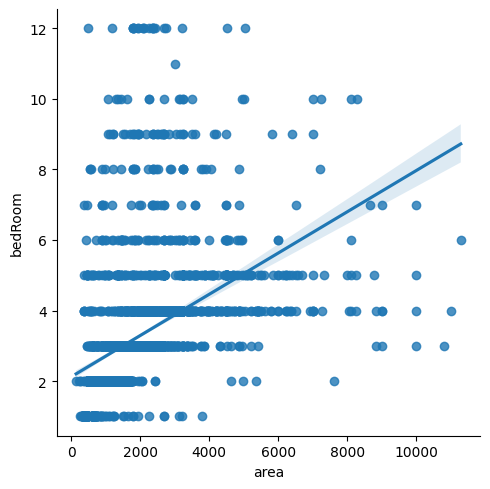

In [ ]:
sns.lmplot(df,x='area',y='bedRoom')

In [ ]:
df['area_room_ratio']=df['area']/df['bedRoom']

<ipython-input-91-b38da4edfd39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio']=df['area']/df['bedRoom']


In [ ]:
outliers_df=df[(df['area_room_ratio']<250) & (df['bedRoom']>3)]

In [ ]:
outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

<ipython-input-93-0770af6b66c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [ ]:
df.update(outliers_df)

In [ ]:
df['area_room_ratio']=df['area']/df['bedRoom']

<ipython-input-95-b38da4edfd39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio']=df['area']/df['bedRoom']


In [ ]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3512,flat,la vida by tata housing,sector 113,2.35,13352.0,1760.0,Super Built up area 2217(205.97 sq.m.)Built Up...,3.0,4.0,3,3.0,West,Relatively New,2217.0,1930.0,1760.0,0.0,1.0,0.0,0.0,0.0,1.0,174.0,586.666667
3668,house,ats tourmaline,sector 109,1.87,8698.0,2150.0,Built Up area: 2150 (199.74 sq.m.),3.0,4.0,0,12.0,NaN,Undefined,NaN,2150.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,716.666667
1657,flat,hsiidc sidco shivalik apartments,manesar,0.60,4000.0,1500.0,Super Built up area 1500(139.35 sq.m.)Carpet a...,3.0,2.0,2,5.0,South-East,Moderately Old,1500.0,NaN,1077.0,0.0,0.0,0.0,0.0,0.0,1.0,80.0,500.000000
3019,house,signature global city,sector 37d,1.27,8089.0,1570.0,Plot area 1570(145.86 sq.m.),3.0,3.0,3,4.0,East,Under Construction,NaN,1570.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,89.0,523.333333
2399,flat,imt view society,manesar,0.95,3652.0,2601.0,Super Built up area 2600(241.55 sq.m.)Carpet a...,3.0,4.0,3,6.0,South-East,Moderately Old,2600.0,NaN,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,81.0,867.000000


In [ ]:
df[(df['area_room_ratio']<250) &(df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
93,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150.000000
387,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,166.666667
753,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0,225.000000
975,house,uppal southend,sector 49,6.75,32328.0,2088.0,Plot area 232(21.55 sq.m.),12.0,12.0,3+,NaN,West,Moderately Old,NaN,232.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,49.0,174.000000
1106,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,180.000000
1206,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,198.000000
1747,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,8.0,200.000000
1936,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2250.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,225.000000
1939,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,222.750000
2806,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,120.000000


In [ ]:
df=df[~((df['area_room_ratio']<250) &(df['bedRoom']>4))]

In [ ]:
df.shape

(3594, 24)

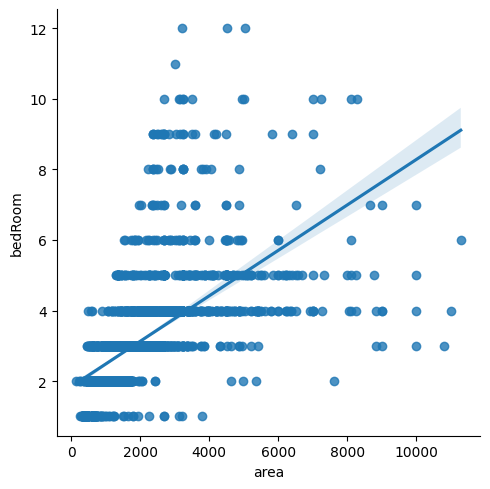

In [ ]:
sns.lmplot(df,x='area',y='bedRoom')

In [ ]:
df.to_csv('gurgaon_properties_outlier_treated.csv',index=False)

In [ ]:

from google.colab import files
files.download('gurgaon_properties_outlier_treated.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>